In [1]:
import glob
import pandas as pd

In [2]:
data = pd.read_csv("dataset/велосипеды/full.csv")

In [3]:
data.head(10)

,Unnamed: 0,id_hash,Взвешенные показы,Дата,Прибыль (руб.),Тип объявления,Доля ВC (%),wCTR (%),Глубина (стр.),Показы,...,Сумма ВC,CTR (%),Ср. объём трафика,Конверсии/Товар добавлен в корзину,Цена ВC (руб.),Конверсия (%)/Лид с Centra Market//Динамика,Ср. позиция показов,Рентабельность,Ср. ставка за клик (руб.),Доля рекламных расходов/Товар добавлен в корзину
0,0,daf177bae33f7ef30af5f06bcea83a97,1.00,2023-06-15,0.00,Текстово-графическое объявление,NaN,0.00,NaN,1.0,...,NaN,0.00,100.00,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,3240,6b42fb2a8266e8586235ed51d82e6b96,1.60,2023-06-15,-43.26,Текстово-графическое объявление,NaN,62.51,2.0,2.0,...,NaN,50.00,79.99,NaN,NaN,NaN,2.0,NaN,94.43,NaN
2,3241,5cbfbeb285efb7b9fb0a7e513c40c4a3,0.83,2023-06-15,0.00,Текстово-графическое объявление,NaN,0.00,NaN,3.0,...,NaN,0.00,27.59,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,3242,5cbfbeb285efb7b9fb0a7e513c40c4a3,0.83,2023-06-15,0.00,Текстово-графическое объявление,NaN,0.00,NaN,3.0,...,NaN,0.00,27.59,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,3243,5cbfbeb285efb7b9fb0a7e513c40c4a3,0.83,2023-06-15,0.00,Текстово-графическое объявление,NaN,0.00,NaN,3.0,...,NaN,0.00,27.59,NaN,NaN,NaN,4.0,NaN,NaN,NaN
5,3244,cb10dd5c93846979b308ccd027dd5cb9,23.90,2023-06-15,-127.94,Текстово-графическое объявление,NaN,16.74,1.5,30.0,...,NaN,13.33,79.65,NaN,NaN,NaN,1.9,NaN,102.04,NaN
6,3245,cb10dd5c93846979b308ccd027dd5cb9,23.90,2023-06-15,-127.94,Текстово-графическое объявление,NaN,16.74,1.5,30.0,...,NaN,13.33,79.65,NaN,NaN,NaN,1.9,NaN,102.04,NaN
7,3246,cb10dd5c93846979b308ccd027dd5cb9,23.90,2023-06-15,-127.94,Текстово-графическое объявление,NaN,16.74,1.5,30.0,...,NaN,13.33,79.65,NaN,NaN,NaN,1.9,NaN,102.04,NaN
8,3247,cb10dd5c93846979b308ccd027dd5cb9,23.90,2023-06-15,-127.94,Текстово-графическое объявление,NaN,16.74,1.5,30.0,...,NaN,13.33,79.65,NaN,NaN,NaN,1.9,NaN,102.04,NaN
9,3248,cb10dd5c93846979b308ccd027dd5cb9,23.90,2023-06-15,-127.94,Текстово-графическое объявление,NaN,16.74,1.5,30.0,...,NaN,13.33,79.65,NaN,NaN,NaN,1.9,NaN,102.04,NaN


In [153]:
data.keys()

Index(['Unnamed: 0', 'id_hash', 'Взвешенные показы', 'Дата', 'Прибыль (руб.)',
       'Тип объявления', 'Доля ВC (%)', 'wCTR (%)', 'Глубина (стр.)', 'Показы',
       'Конверсия (%)/Товар добавлен в корзину', 'Отказы (%)',
       'Конверсии/Лид с Centra Market//Динамика',
       'Цена цели (руб.)/Лид с Centra Market//Динамика', 'Клики',
       'Ср. позиция кликов', '№ Объявления', '№ Группы', 'Метка', 'Группа',
       'Доход (руб.)', 'Цена цели (руб.)/Товар добавлен в корзину',
       'Расход (руб.)', 'Ср. цена клика (руб.)',
       'Доля рекламных расходов/Лид с Centra Market//Динамика', 'Сумма ВC',
       'CTR (%)', 'Ср. объём трафика', 'Конверсии/Товар добавлен в корзину',
       'Цена ВC (руб.)', 'Конверсия (%)/Лид с Centra Market//Динамика',
       'Ср. позиция показов', 'Рентабельность', 'Ср. ставка за клик (руб.)',
       'Доля рекламных расходов/Товар добавлен в корзину'],
      dtype='object')

### Проанализируем только группы в которых был доход

In [5]:
import numpy as np
rows = np.unique(data['№ Объявления'].values)

In [11]:
target= open("target.txt").readline()
target = target.replace('\'',"")
target = target.replace('\"',"")
target = target.replace('\n',"")
target = target.split(",")

target+=['Доход (руб.)']
print(target)

['Взвешенные показы', ' Доля рекламных расходов/Заказ оформлен', 'Прибыль (руб.)', 'Доля ВC (%)', 'wCTR (%)', 'Глубина (стр.)', 'Показы', 'Конверсии/Заказ оформлен', 'Конверсия (%)/Товар добавлен в корзину', 'Отказы (%)', 'Конверсия (%)/Заказ оформлен', 'Конверсии/Лид с Centra Market//Динамика', 'Цена цели (руб.)/Лид с CentraДоход (руб.)', 'Цена цели (руб.)/Товар добавлен в корзину', 'Расход (руб.)', 'Ср. цена клика (руб.)', 'Сумма ВC', 'CTR (%)', 'Ср. объём трафика', 'Конверсии/Товар добавлен в корзину', 'Цена ВC (руб.)', 'Конверсия (%)/Лид с Centra Market//Динамика', 'Ср. позиция показов', 'Рентабельность', 'Ср. ставка за клик (руб.)', 'Доля рекламных расходов/Товар добавлен в корзину', 'Доход (руб.)']


In [12]:
positive_keys = []
data = pd.read_csv("dataset/велосипеды/full.csv")
for row_key in rows:
    target_keys = [t for t in list(data.keys()) if t in target]
    grop = data[data['№ Объявления']==row_key][target_keys]
    filtered = grop[grop['Доход (руб.)']>0]
    if filtered.shape[0]>0:
        positive_keys.append(row_key)
        

In [13]:
positive_keys

['M-9591380680',
 'M-9591380692',
 'M-9591380724',
 'M-9591380726',
 'M-9591380744',
 'M-9591380746',
 'M-9591380806',
 'M-9591380808',
 'M-9591380820',
 'M-9591380834',
 'M-9591380850',
 'M-9591380852',
 'M-9591380860',
 'M-9591380864',
 'M-9591380872',
 'M-9591380878',
 'M-9591380880']

### Смотрим колонки, в которых больше 80% информация присутствует 

In [14]:
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("dataset/велосипеды/full.csv")
target_keys = [t for t in list(data.keys()) if t in target]
target_keys += ['Дата']
grop_1 = data[data['№ Объявления']==positive_keys[11]][target_keys]
thresh = len(grop_1) * 0.8
grop_1_cleaned = grop_1.dropna(axis=1, thresh=thresh)
grop_1_cleaned['Дата'] = pd.to_datetime(grop_1_cleaned['Дата'])
grop_1_cleaned.keys()

/var/folders/fq/3g_66wjn7h7gfmsyw5r8719c0000gs/T/ipykernel_1888/308838380.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grop_1_cleaned['Дата'] = pd.to_datetime(grop_1_cleaned['Дата'])


Index(['Взвешенные показы', 'Прибыль (руб.)', 'wCTR (%)', 'Показы',
       'Доход (руб.)', 'Расход (руб.)', 'CTR (%)', 'Ср. объём трафика',
       'Ср. позиция показов', 'Дата'],
      dtype='object')

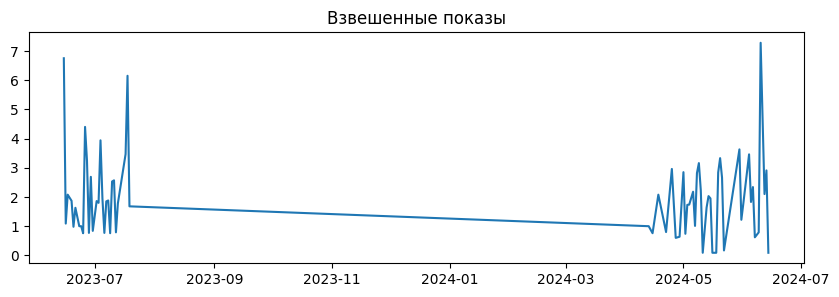

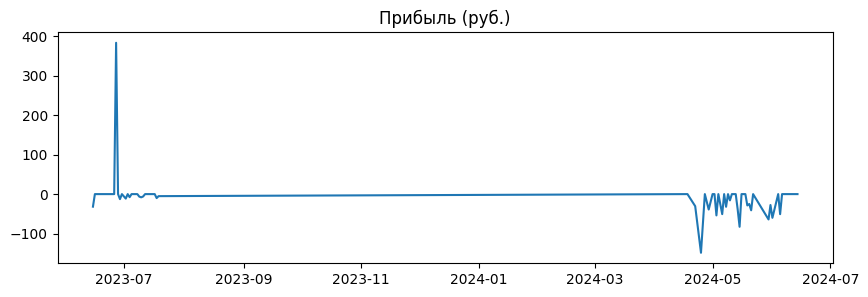

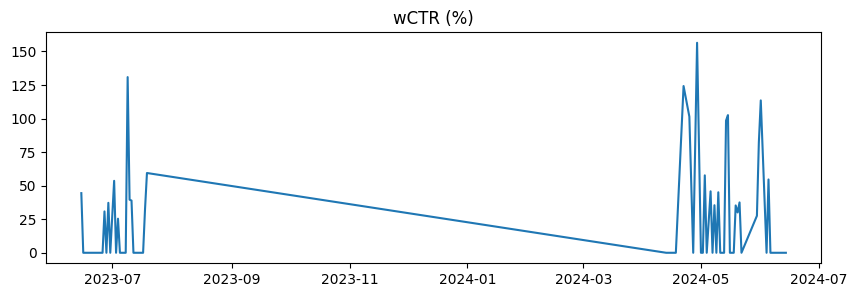

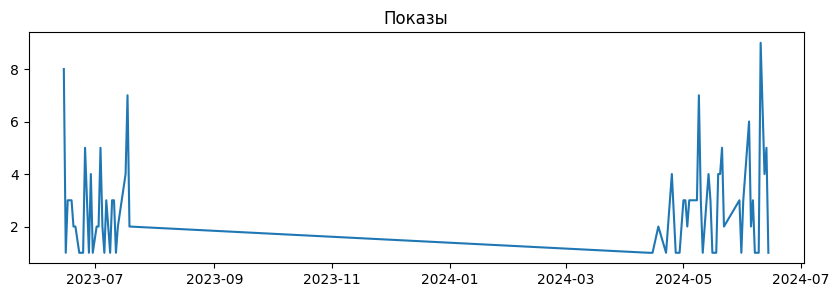

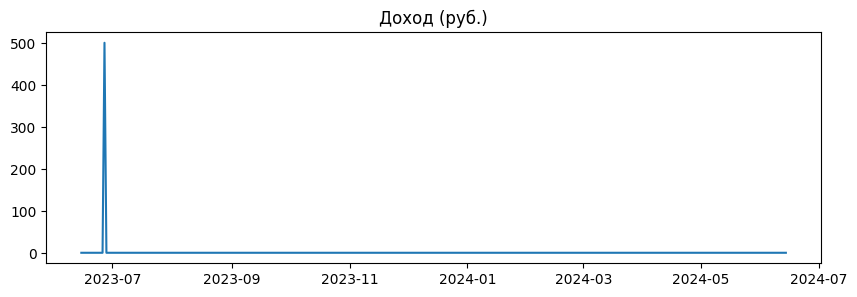

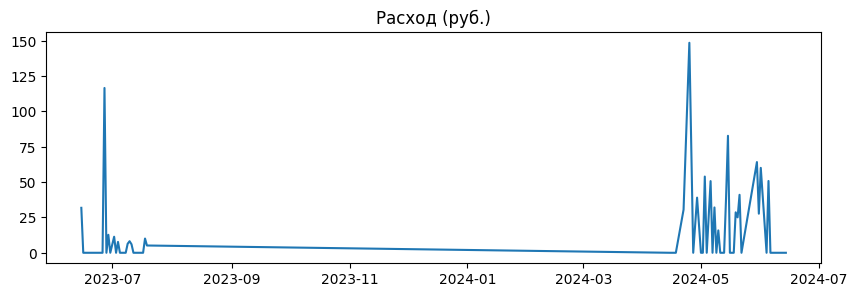

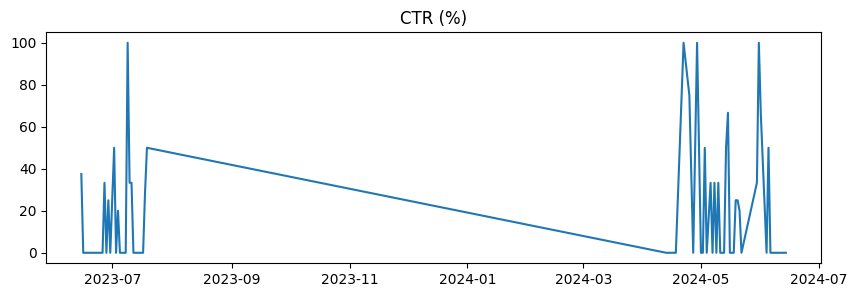

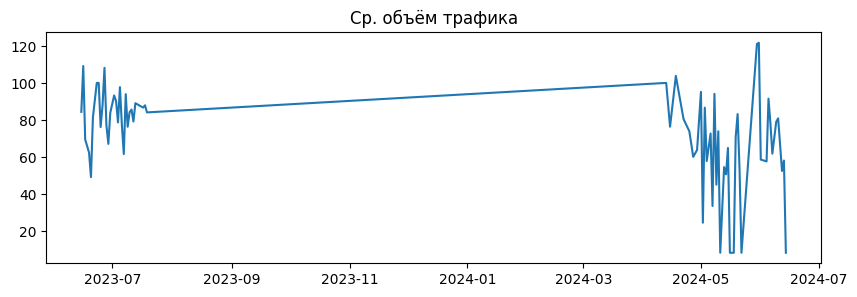

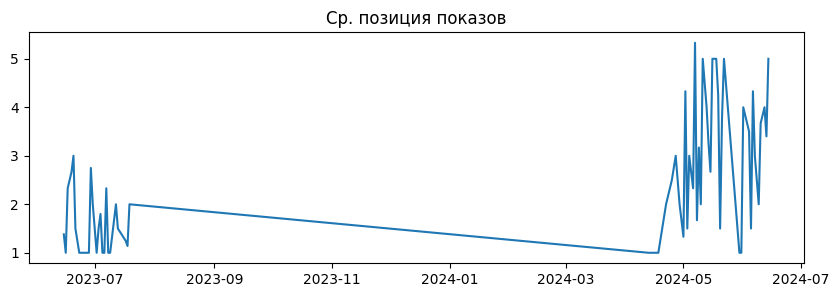

In [16]:
for key in list(grop_1_cleaned.keys()):
    if key == 'Дата':
        continue
    plt.figure(figsize = (10, 3))
    plt.plot(grop_1_cleaned['Дата'], grop_1_cleaned[key])
    plt.title(key)
    plt.show()

In [17]:
import seaborn as sns

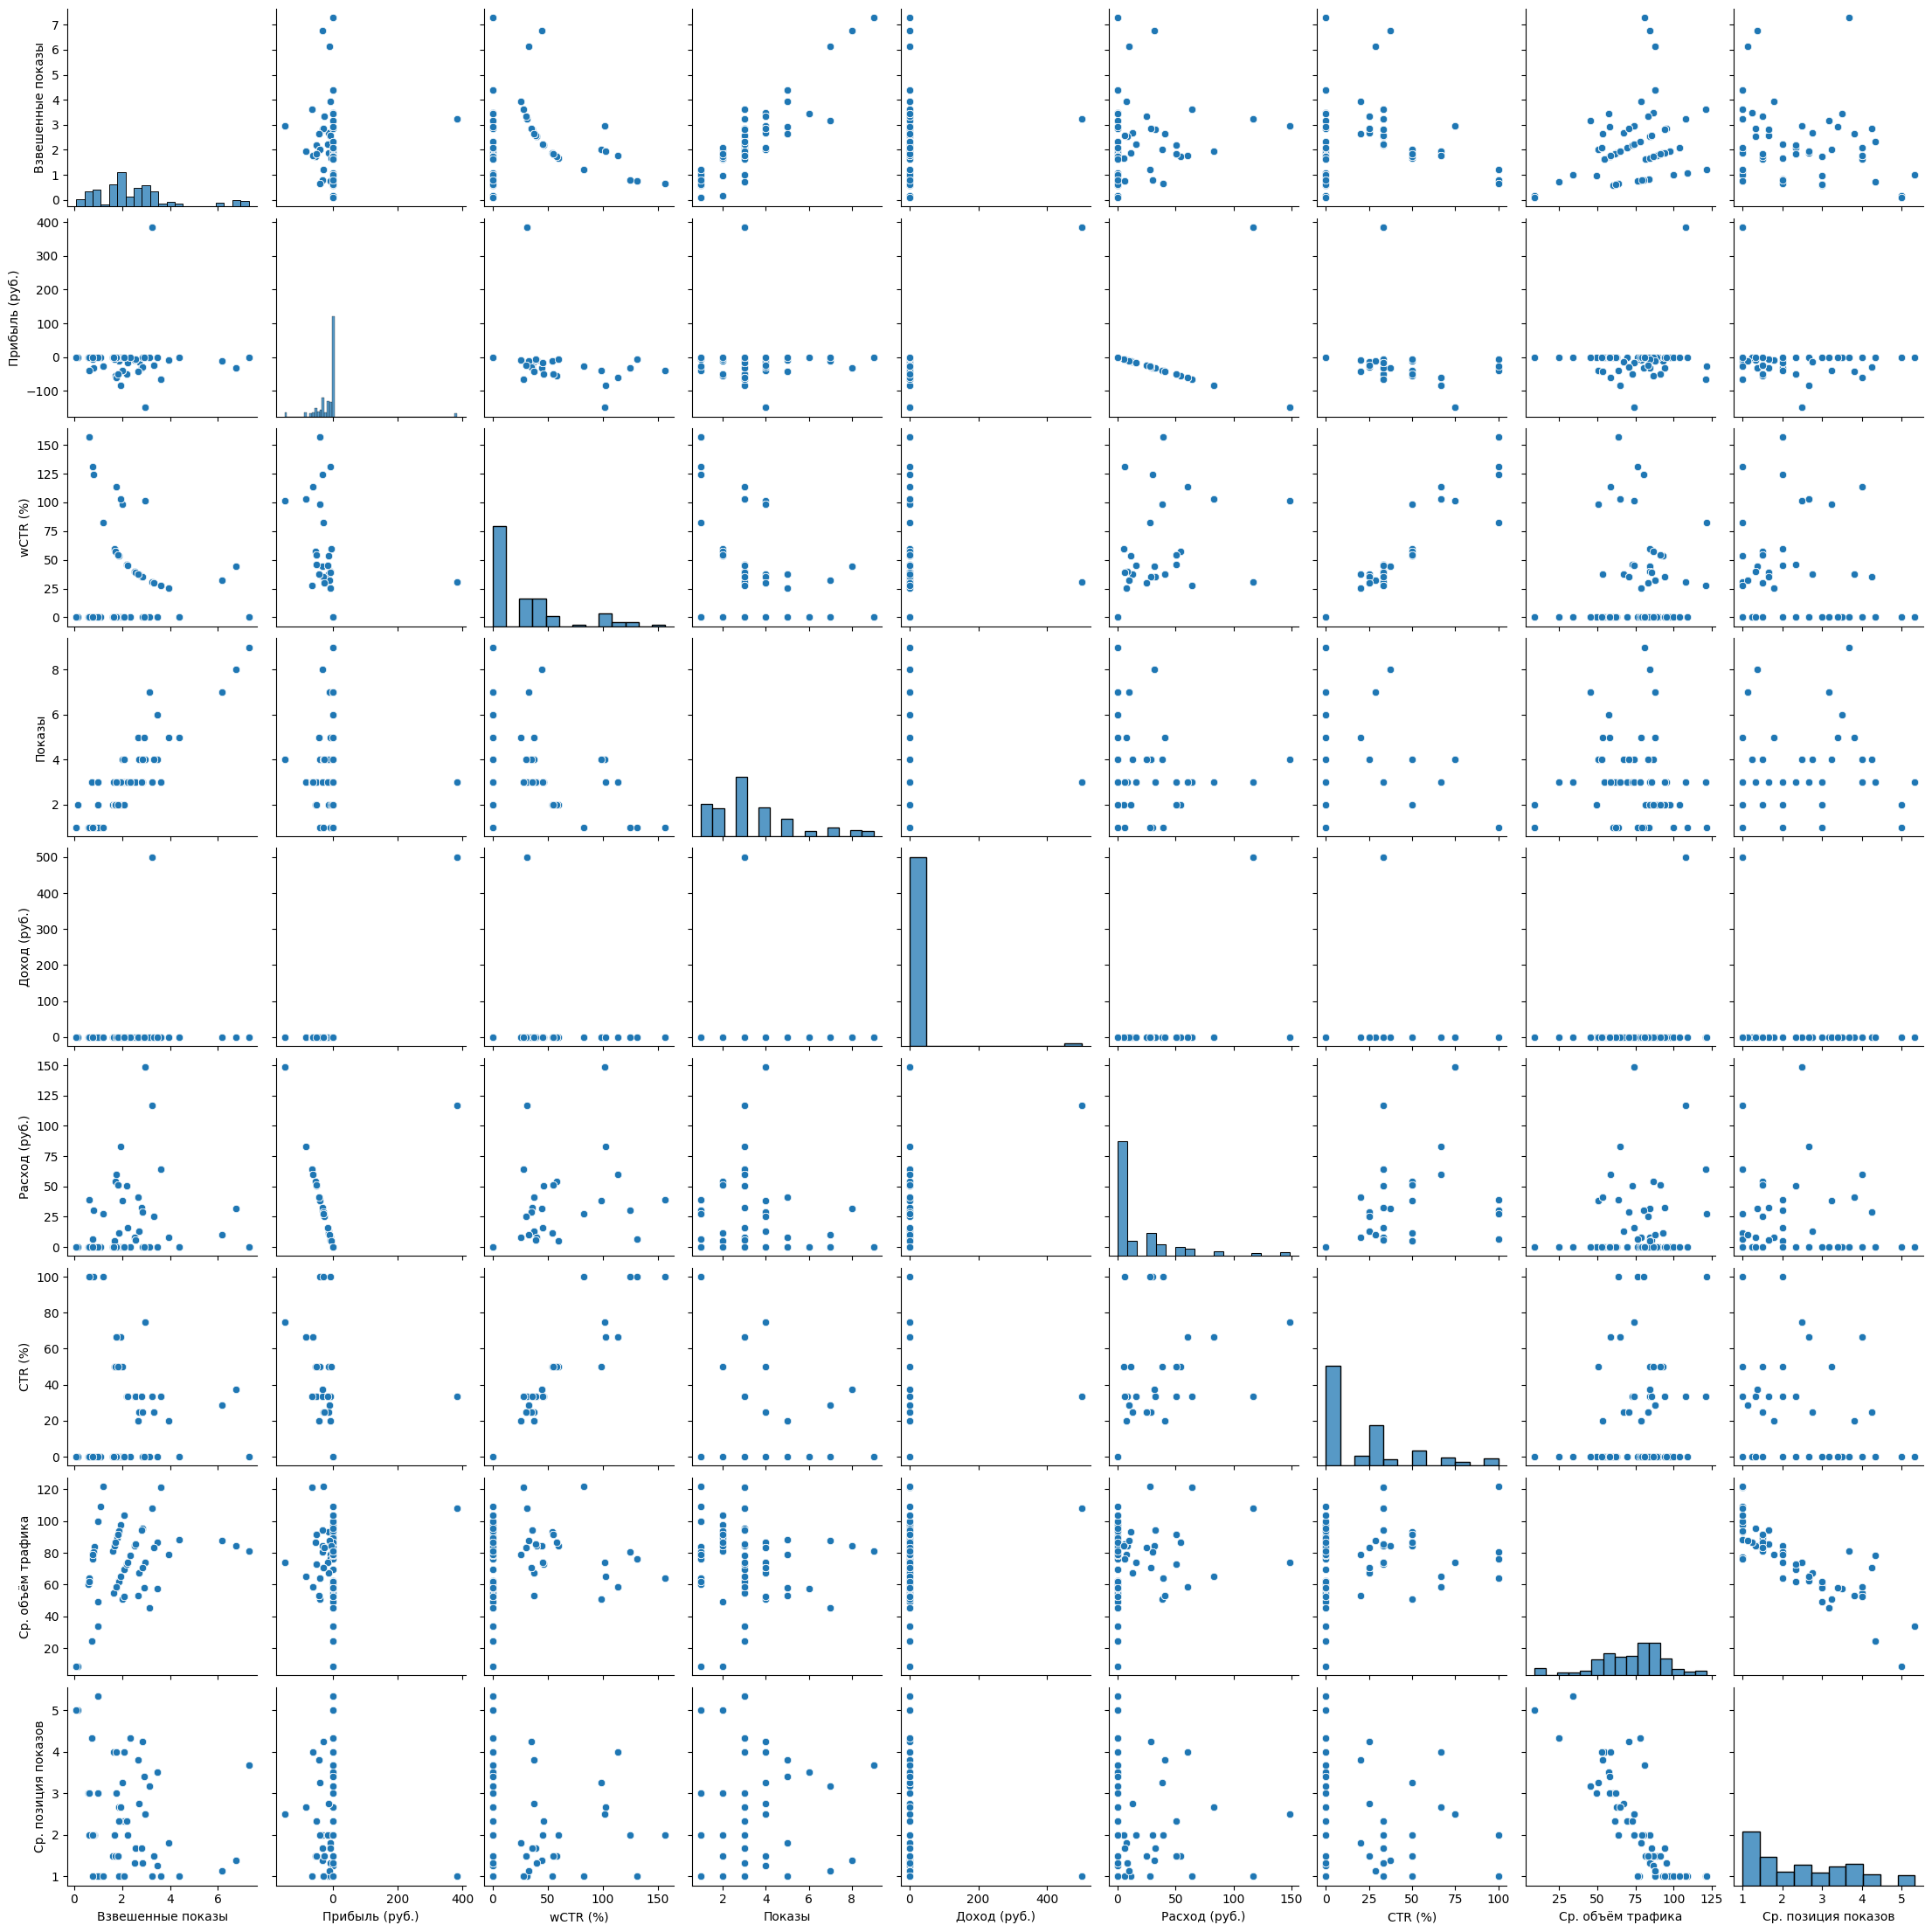

In [18]:
sns.pairplot(grop_1_cleaned)

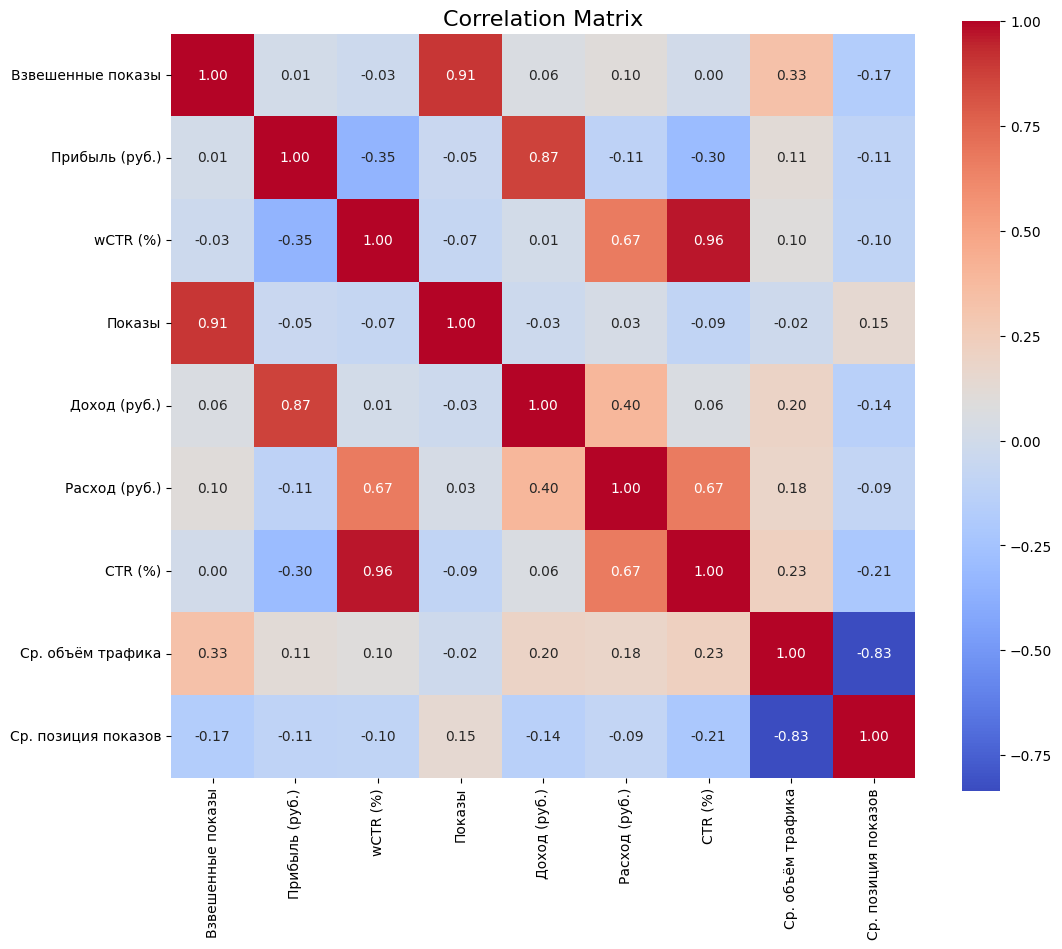

In [19]:
keys = list(grop_1_cleaned.keys())
keys.pop(-1)
correlation_matrix = grop_1_cleaned[keys].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title('Correlation Matrix', fontsize=16)
plt.show()

### Поиск общего тренда в прибыли

In [20]:
agg_func_describe = {'Прибыль (руб.)': ['describe']}

def f(row):
    return row in positive_keys
mask = data['№ Объявления'].apply(f)
data[mask][['№ Объявления','Прибыль (руб.)']].groupby(['№ Объявления']).agg(agg_func_describe).round(2)

Прибыль (руб.)                                                   
                   describe                                                   
                      count   mean     std     min     25%    50%  75%     max
№ Объявления                                                                  
M-9591380680          229.0   4.15   76.38  -83.98    0.00   0.00  0.0  453.15
M-9591380692          101.0  22.08  106.64  -14.94    0.00   0.00  0.0  486.62
M-9591380724          379.0   1.32  145.21 -145.27  -56.96  -9.92  0.0  674.44
M-9591380726           89.0  13.86   75.09  -20.77    0.00   0.00  0.0  357.25
M-9591380744         1047.0 -52.36  151.83 -381.47 -111.04 -13.42  0.0  472.18
M-9591380746          662.0  -1.61   70.65 -102.32  -25.11   0.00  0.0  352.02
M-9591380806         1187.0 -32.95  123.19 -285.69  -86.39 -33.65  0.0  406.04
M-9591380808         1083.0 -15.54  182.14 -375.97  -66.67 -13.40  0.0  884.80
M-9591380820         1066.0 -14.63   91.74 -159.35  -43.16 -12.56  0.0  447.46
M-9591380834          440.0 -57.17   88.74 -241.62 -108.96 -58.72  0.0  316.58
M-9591380850          302.0  -2.67   62.89  -85.62  -23.23   0.00  0.0  358.62
M-9591380852          401.0 -11.15   56.18 -148.63  -28.64   0.00  0.0  383.36
M-9591380860          451.0 -18.32   56.51 -118.86  -34.36 -12.43  0.0  262.56
M-9591380864          710.0 -25.88   81.62 -188.03  -51.32 -20.35  0.0  436.80
M-9591380872          527.0  -1.74   57.82 -100.15   -5.13   0.00  0.0  367.49
M-9591380878          200.0  11.63  132.73  -93.51  -60.97   0.00  0.0  447.77
M-9591380880          604.0 -10.48   78.93 -157.80  -36.63   0.00  0.0  425.88

In [21]:
mask = data['№ Объявления'].apply(f)
pivoted_data = data[mask].pivot_table(values='Прибыль (руб.)', index='Дата', columns='№ Объявления')
pivoted_data = pivoted_data.fillna(0)
correlation_matrix = pivoted_data.corr()


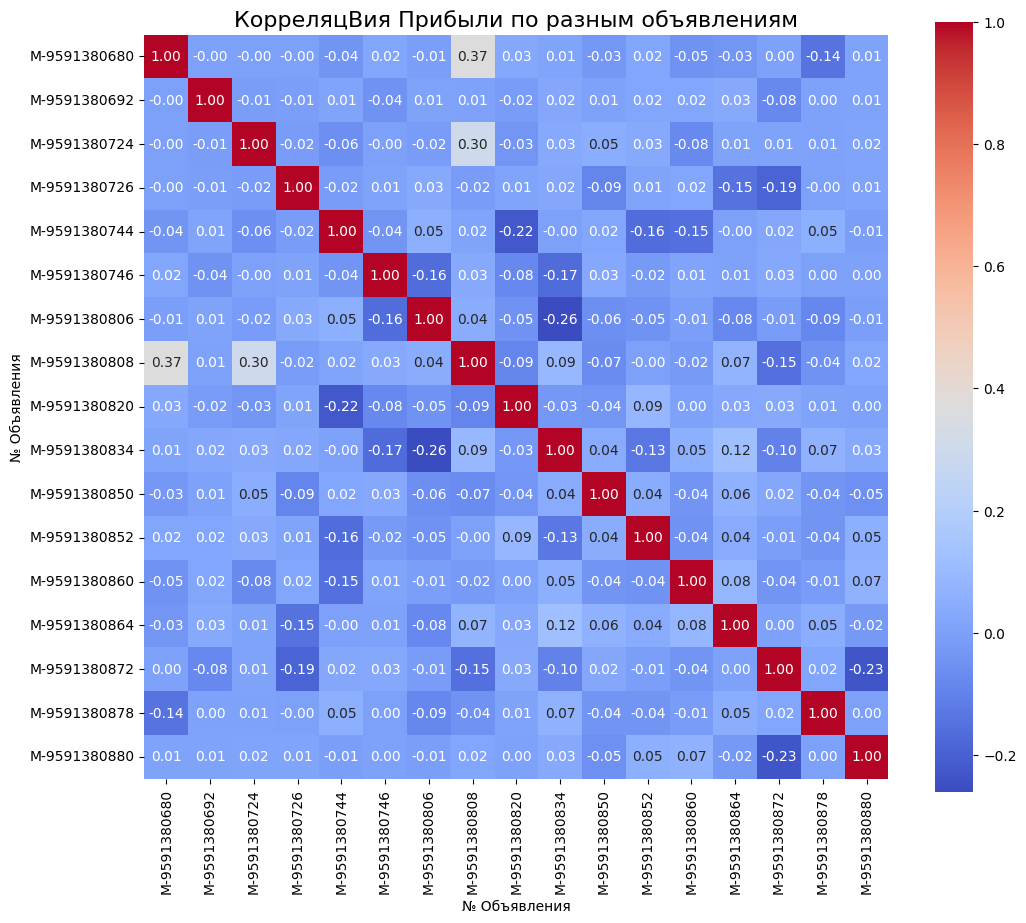

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title('КорреляцВия Прибыли по разным объявлениям', fontsize=16)
plt.show()

#### Отрисуем, графики в которых большая и низкая корреляция Прибыли

In [23]:

corr_pairs = correlation_matrix.unstack().drop(labels=[(col, col) for col in correlation_matrix.columns])
high_corr_pairs = corr_pairs[corr_pairs >= 0.3].sort_values(ascending=False)
correlated_indexes = list(high_corr_pairs.keys())

<Axes: xlabel='Дата'>

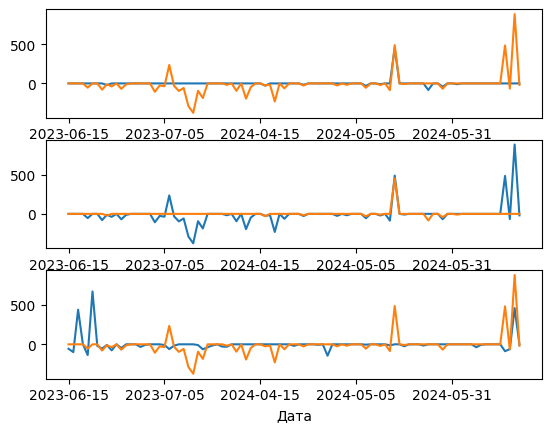

In [24]:
plt.subplot(3,1,1)
pivoted_data[correlated_indexes[0][0]].plot()
pivoted_data[correlated_indexes[0][1]].plot()
plt.subplot(3,1,2)
pivoted_data[correlated_indexes[1][0]].plot()
pivoted_data[correlated_indexes[1][1]].plot()
plt.subplot(3,1,3)
pivoted_data[correlated_indexes[2][0]].plot()
pivoted_data[correlated_indexes[2][1]].plot()

#### Строим графики с антикорреляцией

In [25]:
corr_pairs = correlation_matrix.unstack().drop(labels=[(col, col) for col in correlation_matrix.columns])
low_corr_pairs = corr_pairs[corr_pairs <= -0.2].sort_values(ascending=False)
correlated_indexes = list(low_corr_pairs.keys())

<Axes: xlabel='Дата'>

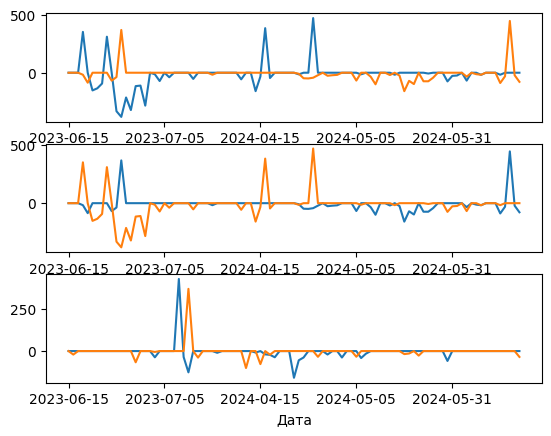

In [26]:
plt.subplot(3,1,1)
pivoted_data[correlated_indexes[0][0]].plot()
pivoted_data[correlated_indexes[0][1]].plot()
plt.subplot(3,1,2)
pivoted_data[correlated_indexes[1][0]].plot()
pivoted_data[correlated_indexes[1][1]].plot()
plt.subplot(3,1,3)
pivoted_data[correlated_indexes[2][0]].plot()
pivoted_data[correlated_indexes[2][1]].plot()

### Строим модели линейной регрессии

In [58]:
y_train = pivoted_data['M-9591380724'].values
#y_train = y_train[np.abs(y_train)>3]
x = np.arange(len(y_train)).reshape(-1, 1)  # В качестве x используем индексы строк

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

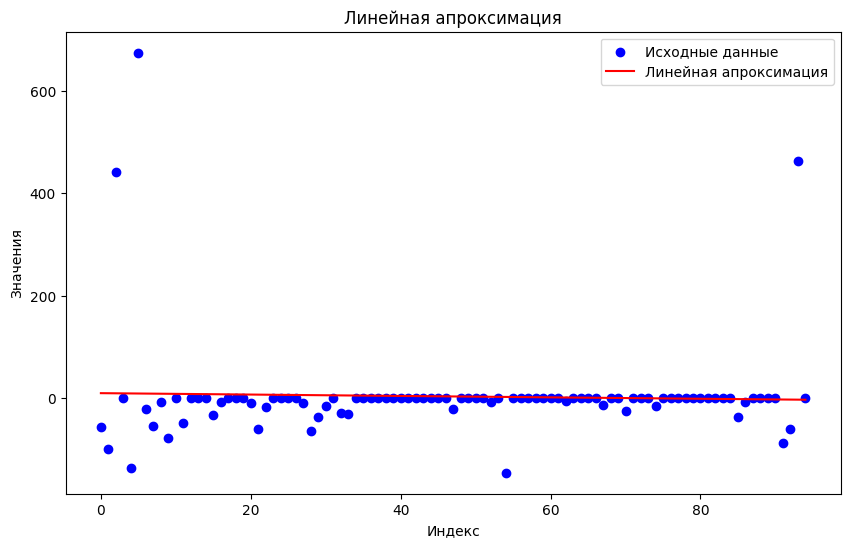

In [60]:
model = LinearRegression()
model.fit(x, y_train)
y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y_train, color='blue', label='Исходные данные')  # Исходные данные
plt.plot(x, y_pred, color='red', label='Линейная апроксимация')  # Линия апроксимации
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.title('Линейная апроксимация')
plt.legend()
plt.show()


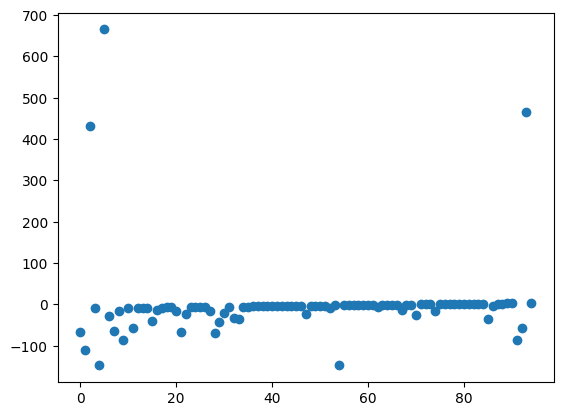

In [61]:
plt.scatter(x, y_train-y_pred)

In [62]:
# Коэффициенты линейной регрессии
coefficients = model.coef_  # Коэффициенты при признаках (наклон линии)
intercept = model.intercept_  # Свободный член (сдвиг по оси Y)

print(f'Коэффициенты: {coefficients}')
print(f'Свободный член (intercept): {intercept}')


Коэффициенты: [-0.13630459]
Свободный член (intercept): 10.010631578947372


In [63]:
from sklearn.preprocessing import PolynomialFeatures

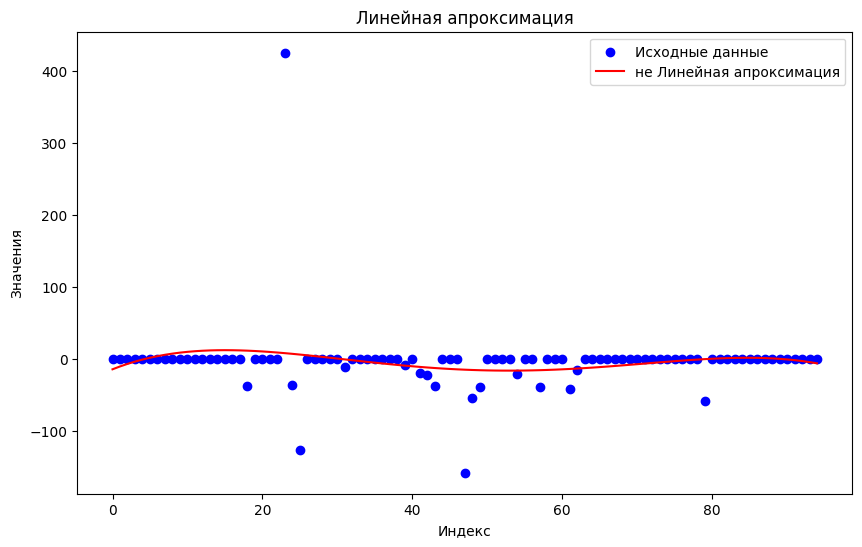

In [76]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y_train)

# Прогнозирование
y_pred = model.predict(x_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x, y_train, color='blue', label='Исходные данные')  # Исходные данные
plt.plot(x, y_pred, color='red', label='не Линейная апроксимация')  # Линия апроксимации
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.title('Линейная апроксимация')
plt.legend()
plt.show()

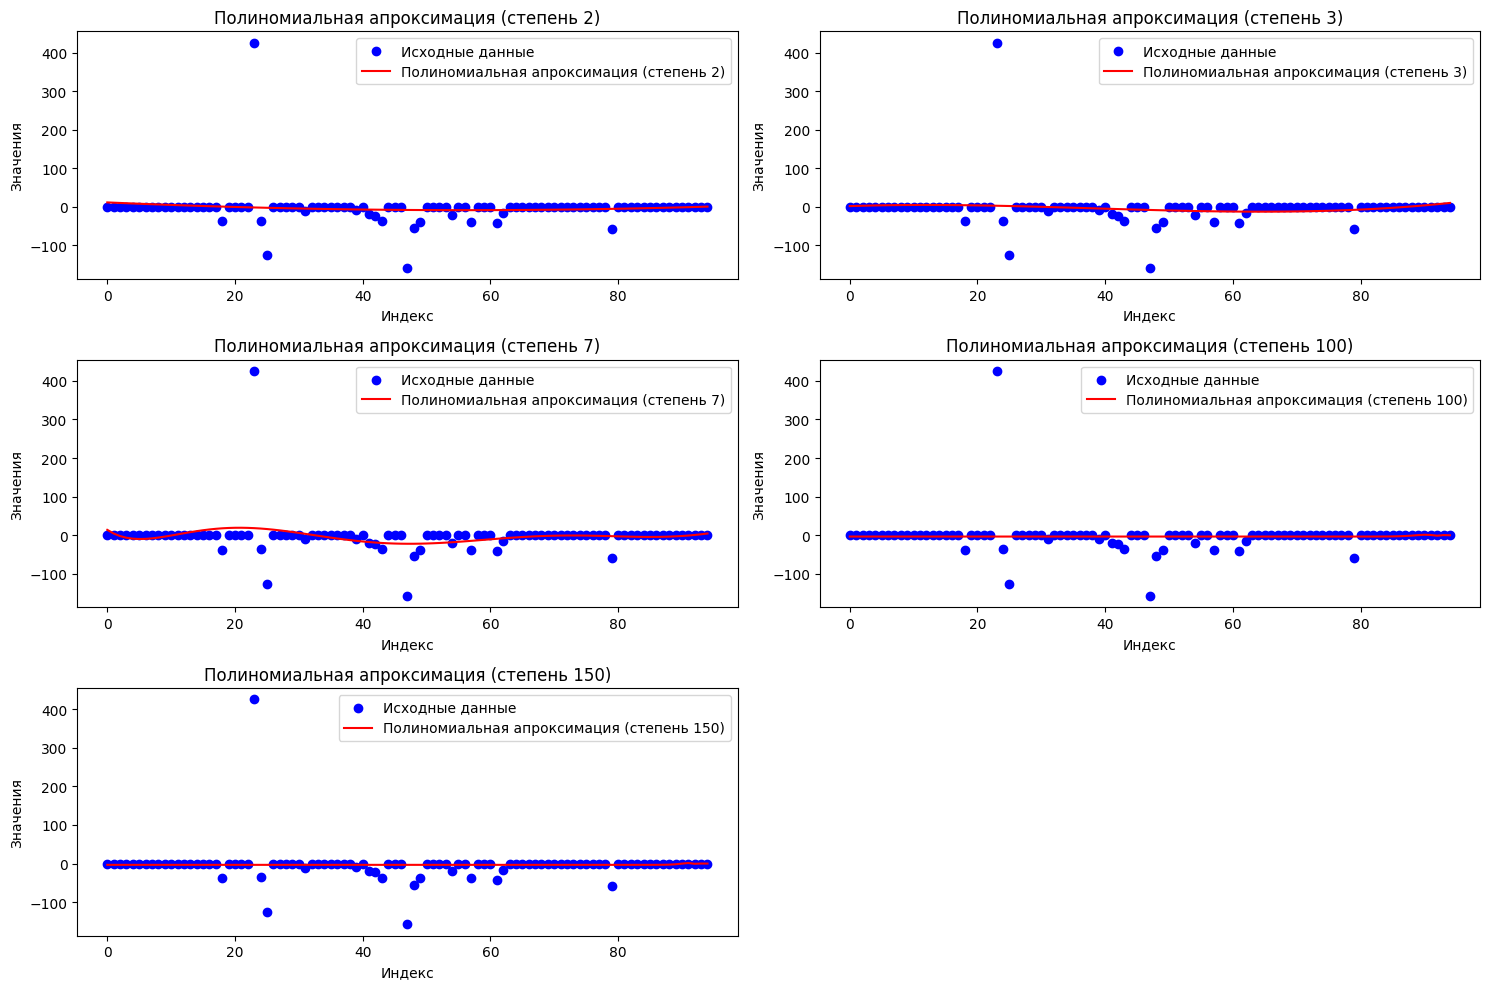

In [77]:

degrees = [2, 3, 7, 100, 150]
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y_train)
    
    y_pred = model.predict(x_poly)
    
    # Subplot for each model
    plt.subplot(3, 2, i)
    plt.scatter(x, y_train, color='blue', label='Исходные данные')
    plt.plot(x, y_pred, color='red', label=f'Полиномиальная апроксимация (степень {degree})')
    plt.xlabel('Индекс')
    plt.ylabel('Значения')
    plt.title(f'Полиномиальная апроксимация (степень {degree})')
    plt.legend()

plt.tight_layout()
plt.show()

In [78]:
numbers = data['№ Объявления']

In [79]:
coefficients = []
intercepts = []  # Свободный член (сдвиг по оси Y)

for key in positive_keys:
    model = LinearRegression()
    y_train = pivoted_data[key].values
    x = np.arange(len(y_train)).reshape(-1, 1)
    
    model.fit(x, y_train)
    y_pred = model.predict(x)

    # Коэффициенты линейной регрессии
    coefficients.append(model.coef_[0])
    intercepts.append(model.intercept_)



In [89]:
coefficients

[0.08202113661814105,
 0.021586366181410997,
 -0.13630459126539757,
 -0.04485946248600225,
 0.6493299272116464,
 -0.11254983202687578,
 0.5349626259798433,
 1.4118828387458011,
 -0.20853457446808515,
 0.5041604143337064,
 -0.011785134378499413,
 -0.3563817189249721,
 -0.03841643337066067,
 -0.0745792273236282,
 -0.0847973124300112,
 0.12483370660694289,
 -0.11609392497200449]

(array([2., 8., 3., 0., 1., 2., 0., 0., 0., 1.]),
 array([-0.35638172, -0.17955526, -0.00272881,  0.17409765,  0.3509241 ,
         0.52775056,  0.70457702,  0.88140347,  1.05822993,  1.23505638,
         1.41188284]),
 <BarContainer object of 10 artists>)

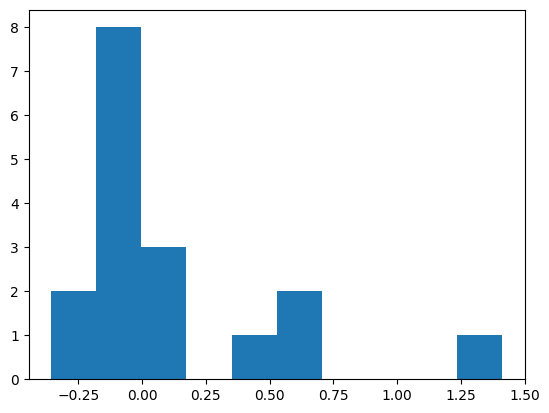

In [86]:
plt.hist(coefficients)

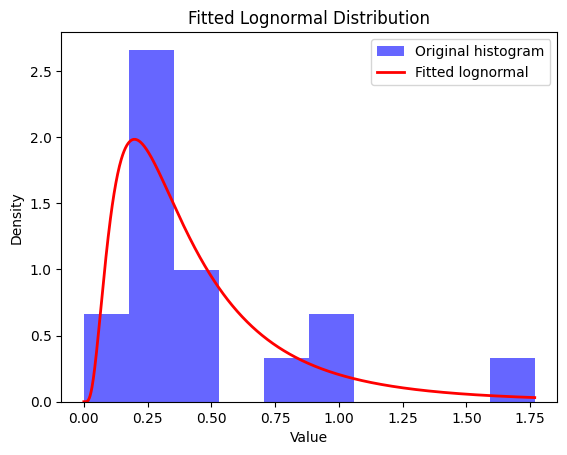

In [88]:

from scipy.stats import lognorm

# Данные гистограммы
hist_values = np.array([2., 8., 3., 0., 1., 2., 0., 0., 0., 1.])
bin_edges = np.array([-0.35638172, -0.17955526, -0.00272881,  0.17409765,  0.3509241 ,
                      0.52775056,  0.70457702,  0.88140347,  1.05822993,  1.23505638, 1.41188284]) + 0.35638172

# Рассчитаем центры бинов
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Повторим центры бинов согласно их частотам
data = np.repeat(bin_centers, hist_values.astype(int))

# Применяем логарифм к данным
log_data = np.log(data[data > 0])  # Отбрасываем нулевые и отрицательные значения для логнормального распределения

# Оценим параметры нормального распределения
mu = np.mean(log_data)
sigma = np.std(log_data)


# Параметры логнормального распределения
s = sigma  # это стандартное отклонение в логнормальном распределении
scale = np.exp(mu)  # это экспонента от среднего

# Создаем значения для отрисовки
x = np.linspace(bin_edges[0], bin_edges[-1], 1000)

# Отрисовываем исходную гистограмму
plt.hist(data, bins=bin_edges, density=True, alpha=0.6, color='b', label='Original histogram')

# Добавляем линию логнормального распределения
pdf_fitted = lognorm.pdf(x, s, scale=scale)
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Fitted lognormal')

# Настройка графика
plt.title('Fitted Lognormal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Показываем график
plt.show()


In [111]:
import numpy as np
from scipy import stats

# Исходные коэффициенты
coefficients = [0.08202113661814105,
 0.021586366181410997,
 -0.13630459126539757,
 -0.04485946248600225,
 0.6493299272116464,
 -0.11254983202687578,
 0.5349626259798433,
 1.4118828387458011,
 -0.20853457446808515,
 0.5041604143337064,
 -0.011785134378499413,
 -0.3563817189249721,
 -0.03841643337066067,
 -0.0745792273236282,
 -0.0847973124300112,
 0.12483370660694289,
 -0.11609392497200449]

# Сдвиг данных на 0.15
shifted_coefficients = np.array(coefficients) + 0.35

# Логарифм модуля коэффициентов и сохранение знака
log_transformed = np.sign(shifted_coefficients) * np.log(np.abs(shifted_coefficients))

# Пересчитываем среднее значение
mean_log_transformed = np.mean(log_transformed)

# Выполняем t-тест на предмет того, что среднее значение логарифмированных коэффициентов меньше 0
t_stat, p_value = stats.ttest_1samp(log_transformed, 0.35)

# Корректируем p-значение для одностороннего теста (направленного вниз)
p_value_one_sided = p_value / 2 if t_stat < 0 else 1

print()
# Вывод результатов
print("Логарифмированные значения:", log_transformed)
print("Среднее логарифмированных значений:", mean_log_transformed)
print("t-статистика:", t_stat)
print("Одностороннее p-значение:", p_value_one_sided)




Логарифмированные значения: [-8.39280765e-01 -9.89973962e-01 -1.54320360e+00 -1.18698283e+00
 -6.70297387e-04 -1.43779750e+00 -1.22209865e-01  5.66383032e-01
 -1.95569993e+00 -1.57636264e-01 -1.08407389e+00  5.05431779e+00
 -1.16608771e+00 -1.28945527e+00 -1.32726089e+00 -7.44790628e-01
 -1.45283563e+00]
Среднее логарифмированных значений: -0.5692504822753017
t-статистика: -2.385524801645126
Одностороннее p-значение: 0.014881898580809539


**Анализ результатов:** Поскольку p-значение меньше 0.05, мы можем отклонить нулевую гипотезу о том, что среднее значение равно нулю, в пользу альтернативной гипотезы: среднее значение логарифмированных коэффициентов значительно меньше нуля. Это подтверждает, что в большинстве случаев коэффициенты линейной регрессии имеют тенденцию к отрицательным значениям в логнормальном распределении.

(array([1., 0., 1., 1., 1., 0., 0., 3., 6., 4.]),
 array([-72.23575658, -63.86927105, -55.50278553, -47.1363    ,
        -38.76981447, -30.40332895, -22.03684342, -13.67035789,
         -5.30387237,   3.06261316,  11.42909868]),
 <BarContainer object of 10 artists>)

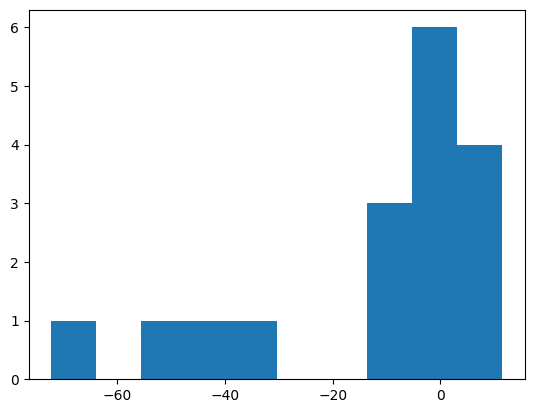

In [81]:
plt.hist(intercepts)

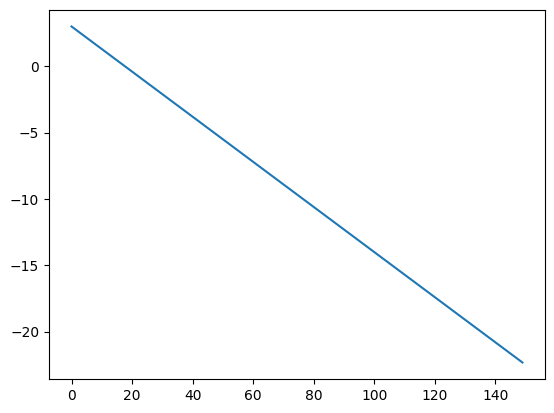

In [82]:
def trand(x, coeff, bias):
    return x*coeff + bias

X = list(range(0,150))
y = [trand(x, -0.17, 3) for x in X]

plt.plot(X,y)

In [85]:
np.std(coefficients)
np.mean(coefficients)

0.12614557670772678

### Корреляция признаков и доходов

In [114]:
import pandas as pd
data = pd.read_csv("dataset/велосипеды/50945786_3.csv")

In [115]:
data.head(5)

,Дата,Группа,№ Группы,№ Объявления,Тип площадки,Формат,Размер изображения,Тип устройства,Пол,Категория таргетинга,...,Клики,CTR (%),wCTR (%),Расход (руб.),Конверсия (%)/Товар добавлен в корзину,Конверсия (%)/Заказ оформлен,Конверсия (%)/Лид с Centra Market//Динамика,Конверсии/Товар добавлен в корзину,Конверсии/Заказ оформлен,Конверсии/Лид с Centra Market//Динамика
0,15.06.2023,Велосипед Stinger,4296804875,M-9591380676,поиск,текстовый,без изображения,мобильные,не определен,Целевые запросы,...,0,0.0,0.0,0.0,-,-,-,-,-,-
1,15.06.2023,Велосипед Stinger,4296804875,M-9591380678,поиск,графический,с изображением,десктоп,мужской,Запросы с упоминанием конкурентов,...,0,0.0,0.0,0.0,-,-,-,-,-,-
2,15.06.2023,Велосипед Женский,4296804877,M-9591380694,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,0,0.0,0.0,0.0,-,-,-,-,-,-
3,15.06.2023,Велосипед Женский,4296804877,M-9591380696,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,0,0.0,0.0,0.0,-,-,-,-,-,-
4,15.06.2023,Велосипед Складной,4296804880,M-9591380710,поиск,текстовый,без изображения,мобильные,мужской,Целевые запросы,...,0,0.0,0.0,0.0,-,-,-,-,-,-


In [116]:
data.keys()

Index(['Дата', 'Группа', '№ Группы', '№ Объявления', 'Тип площадки', 'Формат',
       'Размер изображения', 'Тип устройства', 'Пол', 'Категория таргетинга',
       'Упоминание брендов', 'Уровень платежеспособности', 'Возраст',
       'Заголовок', 'Текст', 'Ссылка', 'Показы', 'Взвешенные показы', 'Клики',
       'CTR (%)', 'wCTR (%)', 'Расход (руб.)',
       'Конверсия (%)/Товар добавлен в корзину',
       'Конверсия (%)/Заказ оформлен',
       'Конверсия (%)/Лид с Centra Market//Динамика',
       'Конверсии/Товар добавлен в корзину', 'Конверсии/Заказ оформлен',
       'Конверсии/Лид с Centra Market//Динамика'],
      dtype='object')

In [117]:
X = ['Группа', 'Тип площадки', 'Формат', 'Тип устройства', 'Пол', 'Категория таргетинга',
       'Упоминание брендов', 'Уровень платежеспособности', 'Возраст']

y = ['CTR (%)']

In [119]:
X_data = data[X]
y_data = data[y]


mask = np.where(y_data > 0)


X_data_f = X_data.iloc[mask[0]] 
y_data_f = y_data.iloc[mask[0]]

print(X_data_f)
print(y_data_f)

                      Группа Тип площадки       Формат Тип устройства  \
5          Велосипед Детский        поиск    текстовый      мобильные   
7          Велосипед Детский        поиск    текстовый      мобильные   
8          Велосипед Детский        поиск  графический        десктоп   
9          Велосипед Детский        поиск  графический        десктоп   
30    Велосипед Подростковый        поиск    текстовый      мобильные   
...                      ...          ...          ...            ...   
9887        Велосипед Купить        поиск    текстовый      мобильные   
9905       Велосипед Большой        поиск    текстовый      мобильные   
9910       Велосипед Ангарск        поиск    текстовый      мобильные   
9915             Веломагазин        поиск    текстовый      мобильные   
9920             Веломагазин        поиск  графический        десктоп   

          Пол Категория таргетинга                 Упоминание брендов  \
5     женский      Целевые запросы                

(array([ 14.,  41.,  79.,   7., 240.,   1.,  19.,   3.,   0., 915.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

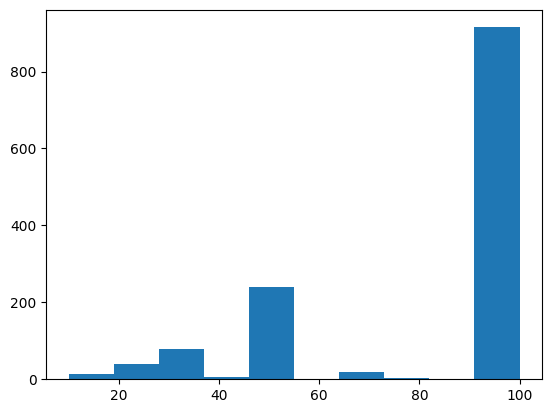

In [120]:
import matplotlib.pyplot as plt

plt.hist(y_data_f)

#### Справка про p_value и t - значения

##### Инструкция по расчету t-значения и p-значения для линейной регрессии

В этом руководстве мы рассмотрим, как рассчитать t-значение и p-значение для коэффициентов линейной регрессии, используя таблицу результатов и Python. Для примера возьмем одну из переменных, "Группа", из регрессионной таблицы.

---

##### Формула для t-значения

t-значение в регрессии показывает, насколько далек коэффициент от нуля, измеренный в единицах стандартной ошибки. Формула для t-значения:


$$ t = \frac{\text{coef}}{\text{std err}} $$ 


-$\(\text{coef}\)$ — это коэффициент для переменной.
- $\(\text{std err}\)$ — это стандартная ошибка для этой переменной.

##### Пример вычисления:

Возьмем коэффициент для переменной "Группа":

- Коэффициент $(\( \text{coef} \))$ = -0.1080
- Стандартная ошибка $(\( \text{std err} \))$ = 0.044

Теперь подставим эти значения в формулу:

$$ t = \frac{-0.1080}{0.044} = -2.455$$ 

---

##### Формула для p-значения

p-значение показывает, насколько маловероятно наблюдать такое значение коэффициента, если нулевая гипотеза (коэффициент = 0) верна. В Python p-значение можно вычислить с помощью распределения Стьюдента. Для этого используется t-значение и число степеней свободы.

##### Формула для p-значения:


$$ p = 2 \times (1 - CDF(|t|, \text{df}))$$ 


где:
- \(CDF\) — это кумулятивная функция распределения Стьюдента,
- \(t\) — рассчитанное t-значение,
- \(df\) — число степеней свободы (остатки модели).

##### Пример расчета p-значения:

1. Рассчитаем t-значение: \(t = -2.455\).
2. Возьмем число степеней свободы из регрессионной таблицы: \(df = 9914\).

В Python p-значение можно рассчитать следующим образом:

```python
import scipy.stats as stats

# Данные
t_value = -2.455
df_residuals = 9914

# Вычисление p-значения (двусторонний тест)
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=df_residuals))

# Вывод результата
print(f"p-значение: {p_value}")
```

Результат:

\[
p = 0.014
\]

Это значение p-значения показывает, что вероятность случайного появления такого t-значения, если коэффициент на самом деле равен нулю, составляет около 1.4%.

---

##### Полный расчет для переменной "Группа":

- Коэффициент (\( \text{coef} \)): -0.1080
- Стандартная ошибка (\( \text{std err} \)): 0.044
- t-значение: \( \frac{-0.1080}{0.044} = -2.455 \)
- Число степеней свободы: 9914
- p-значение: \( p \approx 0.014 \)

Таким образом, коэффициент переменной "Группа" статистически значим, так как p-значение меньше 0.05.

---

##### Пример кода на Python для расчетов:

```python
import scipy.stats as stats

# Коэффициенты и стандартные ошибки
coef = -0.1080  # для переменной "Группа"
std_err = 0.044  # стандартная ошибка
df_residuals = 9914  # число степеней свободы

# Вычисляем t-значение
t_value = coef / std_err

# Вычисляем p-значение (двустороннее)
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=df_residuals))

# Вывод результата
print(f"t-значение: {t_value}")
print(f"p-значение: {p_value}")
```


#### Анализ с категориальными данными

In [121]:
from sklearn.preprocessing import LabelEncoder

In [123]:
X_data_f.head(3)

,Группа,Тип площадки,Формат,Тип устройства,Пол,Категория таргетинга,Упоминание брендов,Уровень платежеспособности,Возраст
5,Велосипед Детский,поиск,текстовый,мобильные,женский,Целевые запросы,не определено,Остальные,18-24
7,Велосипед Детский,поиск,текстовый,мобильные,женский,Целевые запросы,не определено,Остальные,35-44
8,Велосипед Детский,поиск,графический,десктоп,мужской,Целевые запросы,не определено,Остальные,25-34


In [124]:
X_data_categorical = X_data_f.copy()
encoding_dict = {}

for column in X_data_categorical.columns:
    le = LabelEncoder()
    X_data_categorical[column] = le.fit_transform(X_data_categorical[column].astype(str))
    encoding_dict[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [125]:
X_data_categorical.head(3)

,Группа,Тип площадки,Формат,Тип устройства,Пол,Категория таргетинга,Упоминание брендов,Уровень платежеспособности,Возраст
5,13,0,1,1,0,3,3,3,0
7,13,0,1,1,0,3,3,3,2
8,13,0,0,0,1,3,3,3,1


In [126]:
import statsmodels.api as sm
import numpy as np

X = X_data_categorical
y = y_data_f


X = sm.add_constant(X)

model = sm.OLS(y, X)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CTR (%)   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.30
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           4.73e-14
Time:                        12:55:31   Log-Likelihood:                -6171.3
No. Observations:                1319   AIC:                         1.236e+04
Df Residuals:                    1310   BIC:                         1.241e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        116.4538      6.711     17.351      0.000     103.287     129.620
Группа                        -0.2684      0.111     -2.419      0.016      -0.486      -0.051
Тип площадки                1.269e-13   7.77e-15     16.321      0.000    1.12e-13    1.42e-13
Формат                       -13.6110      3.547     -3.837      0.000     -20.570      -6.652
Тип устройства                 5.9045      3.396      1.739      0.082      -0.757      12.566
Пол                           -2.0897      1.480     -1.412      0.158      -4.994       0.815
Категория таргетинга          -1.9183      1.202     -1.596      0.111      -4.276       0.440
Упоминание брендов            -2.4456      0.508     -4.817      0.000      -3.442      -1.450
Уровень платежеспособности    -5.6624      1.825     -3.103      0.002      -9.242      -2.083
Возраст                        0.9344      0.467      2.000      0.046       0.018       1.851
==============================================================================
Omnibus:                      186.315   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.928
Skew:                          -0.933   Prob(JB):                     9.56e-47
Kurtosis:                       2.389   Cond. No.                     1.42e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Модель на основе onehot

In [127]:
import pandas as pd

columns_to_encode = [col for col in X_data_f.columns]
df_encoded = pd.get_dummies(X_data_f, columns=columns_to_encode).astype(int)


In [128]:
df_encoded.head(10)

,Группа_Велик ГЕО,Группа_Велик Купить / Цена,Группа_Веломагазин,Группа_Велосипед +для лет/года,Группа_Велосипед Favorit,Группа_Велосипед Novatrack,Группа_Велосипед Stels,Группа_Велосипед Stinger,Группа_Велосипед Ангарск,Группа_Велосипед Большой,...,Уровень платежеспособности_2-5%,Уровень платежеспособности_6-10%,Уровень платежеспособности_Остальные,Возраст_18-24,Возраст_25-34,Возраст_35-44,Возраст_45-54,Возраст_младше 18,Возраст_не определен,Возраст_старше 55
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [129]:
X = df_encoded
y = y_data_f


X = sm.add_constant(X)

# Создаем модель OLS (Ordinary Least Squares) и подгоняем ее
model = sm.OLS(y, X)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CTR (%)   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4.589
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           7.22e-21
Time:                        12:55:56   Log-Likelihood:                -6110.3
No. Observations:                1319   AIC:                         1.231e+04
Df Residuals:                    1272   BIC:                         1.256e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Группа_Велик ГЕО                                          11.5863      8.106      1.429      0.153      -4.316      27.489
Группа_Велик Купить / Цена                                -5.7494      3.800     -1.513      0.131     -13.205       1.706
Группа_Веломагазин                                        -1.1738      2.927     -0.401      0.688      -6.916       4.568
Группа_Велосипед +для лет/года                            12.3369      4.724      2.612      0.009       3.070      21.604
Группа_Велосипед Favorit                                  -5.5171     12.597     -0.438      0.661     -30.230      19.195
Группа_Велосипед Novatrack                                -4.7302     12.900     -0.367      0.714     -30.038      20.577
Группа_Велосипед Stels                                    -4.6512      2.764     -1.683      0.093     -10.073       0.771
Группа_Велосипед Stinger                                  -5.7022      4.004     -1.424      0.155     -13.557       2.153
Группа_Велосипед Ангарск                                  -3.5765      2.982     -1.199      0.231      -9.427       2.274
Группа_Велосипед Большой                                   5.6143      6.211      0.904      0.366      -6.570      17.799
Группа_Велосипед Братск                                   10.7128      3.659      2.928      0.003       3.535      17.890
Группа_Велосипед Горный                                    4.5425      7.653      0.594      0.553     -10.472      19.557
Группа_Велосипед Девочке                                  -1.0841     10.358     -0.105      0.917     -21.405      19.236
Группа_Велосипед Детский                                   2.6509      3.333      0.795      0.427      -3.888       9.190
Группа_Велосипед Женский                                  -6.0482      8.089     -0.748      0.455     -21.918       9.822
Группа_Велосипед Интернет                                 16.4771      7.335      2.246      0.025       2.087      30.867
Группа_Велосипед Иркутск                                  -4.8582      2.560     -1.897      0.058      -9.881       0.165
Группа_Велосипед Каталог                                  -6.0831      3.372     -1.804      0.071     -12.699       0.532
Группа_Велосипед Купить                                   -8.4423      2.536     -3.328      0.001     -13.418      -3.466
Группа_Велосипед Магазин                                   2.5293      6.810      0.371      0.710     -10.830      15.889
Группа_Велосипед Новый                                    21.2708     17.336      1.227      0.220     -12.739      55.280
Группа_Велосипед Подростковый                             -0.4593      3.322     -0.138      0.890      -6.977       6.058
Группа_В

In [132]:
data_array = [
    "Тип устройства_десктоп", 
    "Тип устройства_мобильные", 
    "Тип устройства_планшеты", 
    "Пол_женский", 
    "Пол_мужской", 
    "Возраст_младше 18", 
    "Возраст_45-54", 
    "Возраст_18-24", 
    "Уровень платежеспособности_2-5%", 
    "Упоминание брендов_С упоминанием вашего бренда", 
    "Упоминание брендов_С упоминанием брендов конкурентов", 
    "Упоминание брендов_Без упоминания вашего бренда", 
    "Категория таргетинга_не определено", 
    "Категория таргетинга_Запросы с упоминанием конкурентов"
]


In [133]:
X = df_encoded[data_array]
y = y_data_f


X = sm.add_constant(X)

# Создаем модель OLS (Ordinary Least Squares) и подгоняем ее
model = sm.OLS(y, X)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CTR (%)   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     8.617
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           4.77e-17
Time:                        13:21:32   Log-Likelihood:                -6157.2
No. Observations:                1319   AIC:                         1.234e+04
Df Residuals:                    1305   BIC:                         1.242e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     65.2851      4.431     14.735      0.000      56.593      73.977
Тип устройства_десктоп                                    22.3703      2.248      9.951      0.000      17.960      26.780
Тип устройства_мобильные                                  14.3808      2.152      6.683      0.000      10.159      18.603
Тип устройства_планшеты                                   28.5340      4.381      6.513      0.000      19.940      37.128
Пол_женский                                               -5.0857      5.829     -0.872      0.383     -16.521       6.350
Пол_мужской                                               -7.7542      5.755     -1.347      0.178     -19.044       3.536
Возраст_младше 18                                         10.8437      4.293      2.526      0.012       2.422      19.266
Возраст_45-54                                              4.0116      2.036      1.971      0.049       0.018       8.005
Возраст_18-24                                              5.5549      2.583      2.151      0.032       0.488      10.622
Уровень платежеспособности_2-5%                            9.4804      4.452      2.129      0.033       0.746      18.215
Упоминание брендов_С упоминанием вашего бренда            19.0568      7.894      2.414      0.016       3.570      34.544
Упоминание брендов_С упоминанием брендов конкурентов      14.4567      4.848      2.982      0.003       4.946      23.967
Упоминание брендов_Без упоминания вашего бренда           10.2144      1.503      6.794      0.000       7.265      13.164
Категория таргетинга_не определено                        19.9251      5.305      3.756      0.000       9.517      30.333
Категория таргетинга_Запросы с упоминанием конкурентов    18.3902      5.299      3.471      0.001       7.995      28.785
==============================================================================
Omnibus:                      174.345   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.829
Skew:                          -0.892   Prob(JB):                     4.94e-43
Kurtosis:                       2.400   Cond. No.                     1.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [173]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

X = df_encoded#[data_array]
y = y_data_f
y_norm = y/100
model.fit(X, y_norm)


coefficients = model.coef_
intercept = model.intercept_

In [174]:
y_ = model.predict(X)

In [175]:
print("MSE on train: ", np.mean((y_norm.values - y_)**2))

MSE on train:  0.06252494452994693


(array([ 70., 140., 276., 353., 206., 147.,  86.,  28.,   9.,   4.]),
 array([0.59375, 0.65625, 0.71875, 0.78125, 0.84375, 0.90625, 0.96875,
        1.03125, 1.09375, 1.15625, 1.21875]),
 <BarContainer object of 10 artists>)

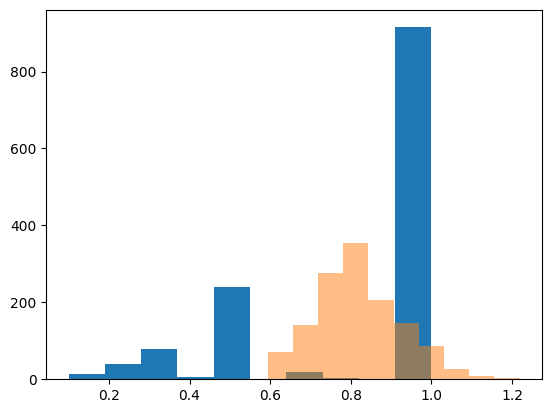

In [176]:
plt.hist(y_norm)
plt.hist(y_, alpha = 0.5)

Text(0.5, 0, 'y predicted')

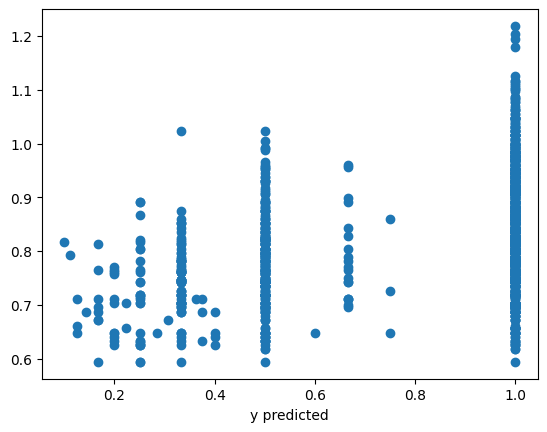

In [180]:
plt.scatter(y_norm, y_)
plt.xlabel("y true")
plt.xlabel("y predicted")